In [2]:
import pandas as pd

# 데이터 경로
data_path = './input/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
train.shape, test.shape

((1821, 5), (1821, 1))

In [4]:
train.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [5]:
test.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [6]:
submission.head()

image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

In [10]:
# 데이터를 타깃값별로 추출
healthy = train.loc[train['healthy'] == 1]
multiple_diseases = train.loc[train['multiple_diseases'] == 1]
rust = train.loc[train['rust'] == 1]
scab = train.loc[train['scab'] == 1]

([<matplotlib.patches.Wedge at 0x16a0bc489d0>,
 [Text(0.6921787180836257, 0.8549202431993926, 'healthy'),
  Text(-0.3942932497177081, 1.0269044908008969, 'multiple_diseases'),
  Text(-1.0996317038245758, -0.028462535794632142, 'rust'),
  Text(0.5744651016901711, -0.9380777403499678, 'scab')],
 [Text(0.377552028045614, 0.4663201326542141, '28.3%'),
  Text(-0.21506904530056806, 0.5601297222550347, '5.0%'),
  Text(-0.5997991111770412, -0.015525019524344801, '34.2%'),
  Text(0.31334460092191146, -0.5116787674636187, '32.5%')])

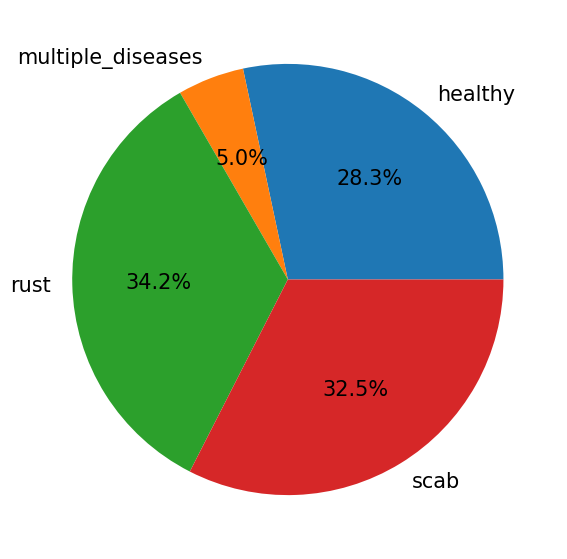

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

label = ['healthy', 'multiple_diseases', 'rust', 'scab'] # 타깃값 레이블
# 타깃값 분포 파이 그래프
plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)],
        labels=label,
        autopct='%.1f%%')

In [12]:
import matplotlib.gridspec as gridspec
import cv2 # OpenCV 라이브러리

def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows*cols # 이미지가 행/열 개수보다 많으면 오류발생
    
    plt.figure(figsize=(15, 8)) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(rows, cols)  # 서브플롯 배치
    
    # 이미지 출력
    for idx, img_id in enumerate(img_ids):
        img_path = f'./input/images/{img_id}.jpg'
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx])
        ax.imshow(image) # 이미지 출력

In [13]:
# 각 타깃값별 image_id(마지막 6개)
num_of_imgs = 6
last_healthy_img_ids = healthy['image_id'][-num_of_imgs:]
last_multiple_diseases_img_ids = multiple_diseases['image_id'][-num_of_imgs:]
last_rust_img_ids = rust['image_id'][-num_of_imgs:]
last_scab_img_ids = scab['image_id'][-num_of_imgs:]

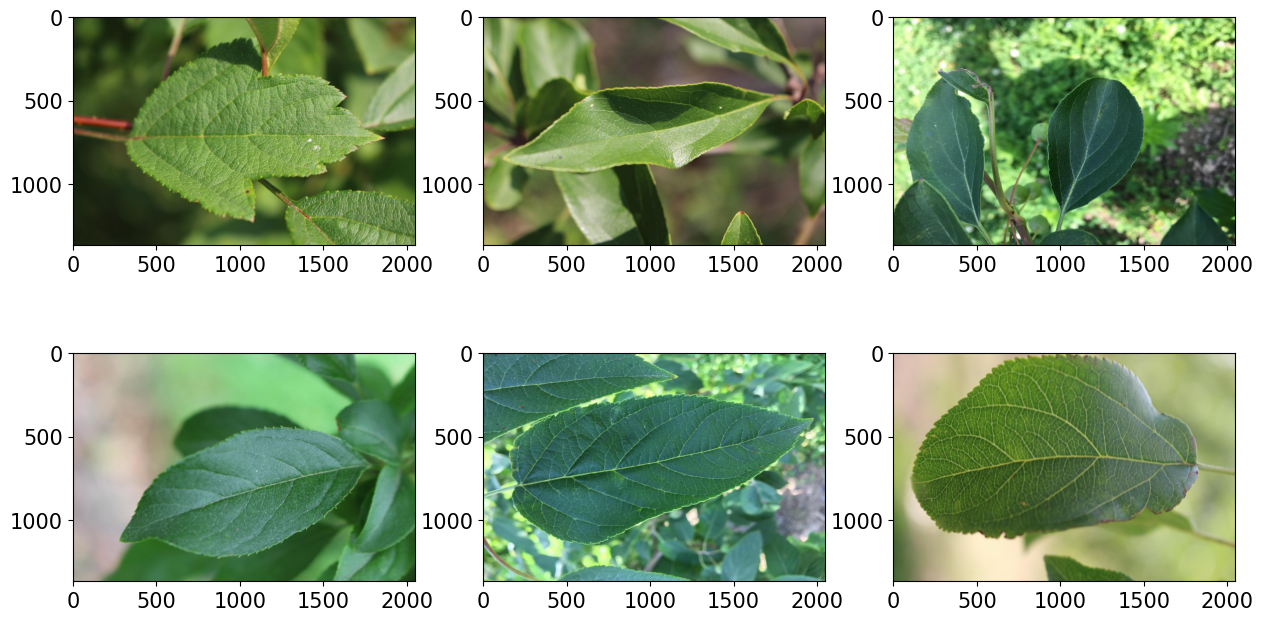

In [14]:
show_image(last_healthy_img_ids) # 건강한 잎사귀 출력

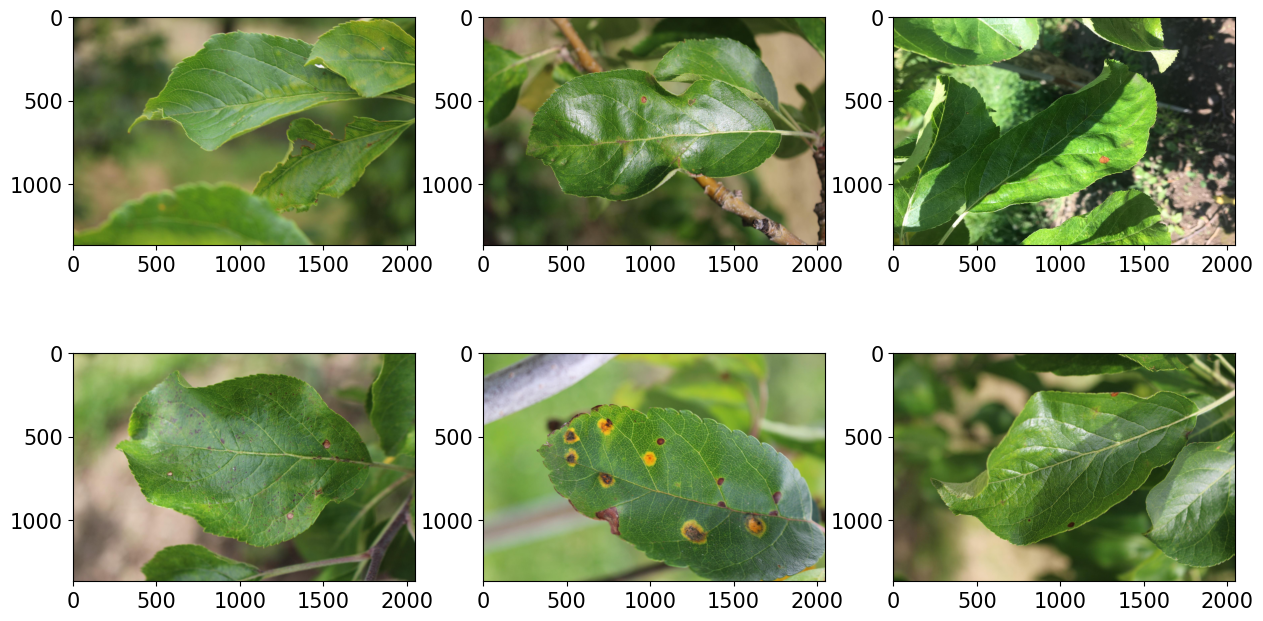

In [15]:
show_image(last_multiple_diseases_img_ids) # 여러 질병에 걸린 잎사귀 출력

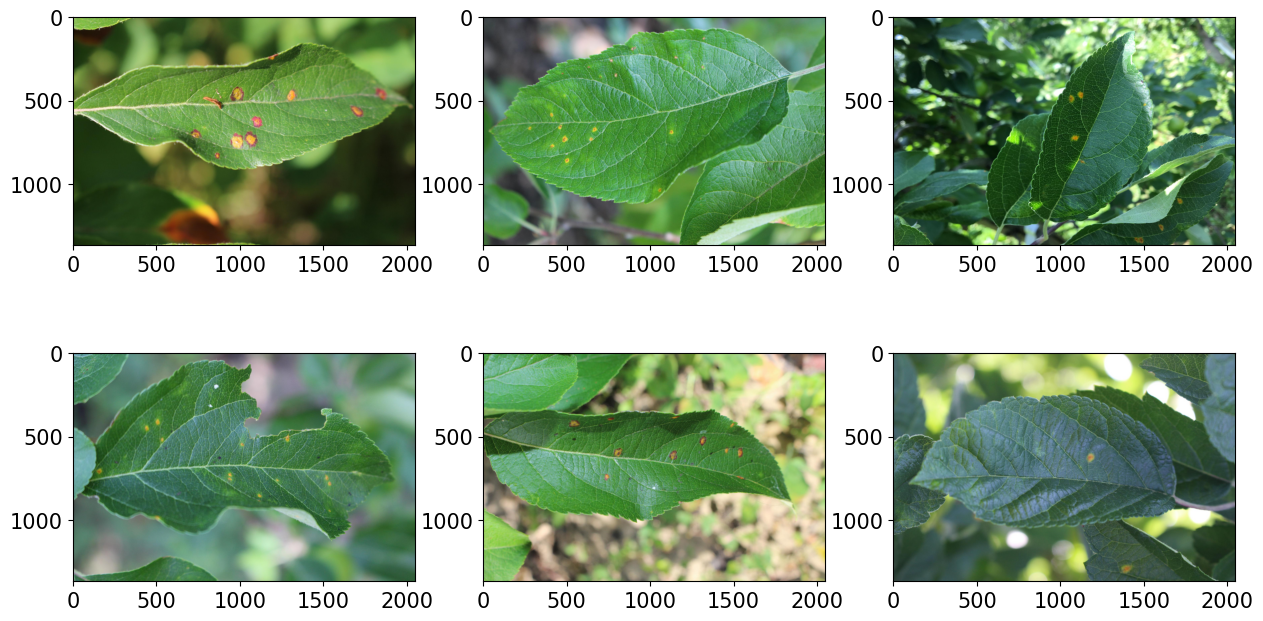

In [16]:
show_image(last_rust_img_ids) # 녹병에 걸린 잎사귀 출력

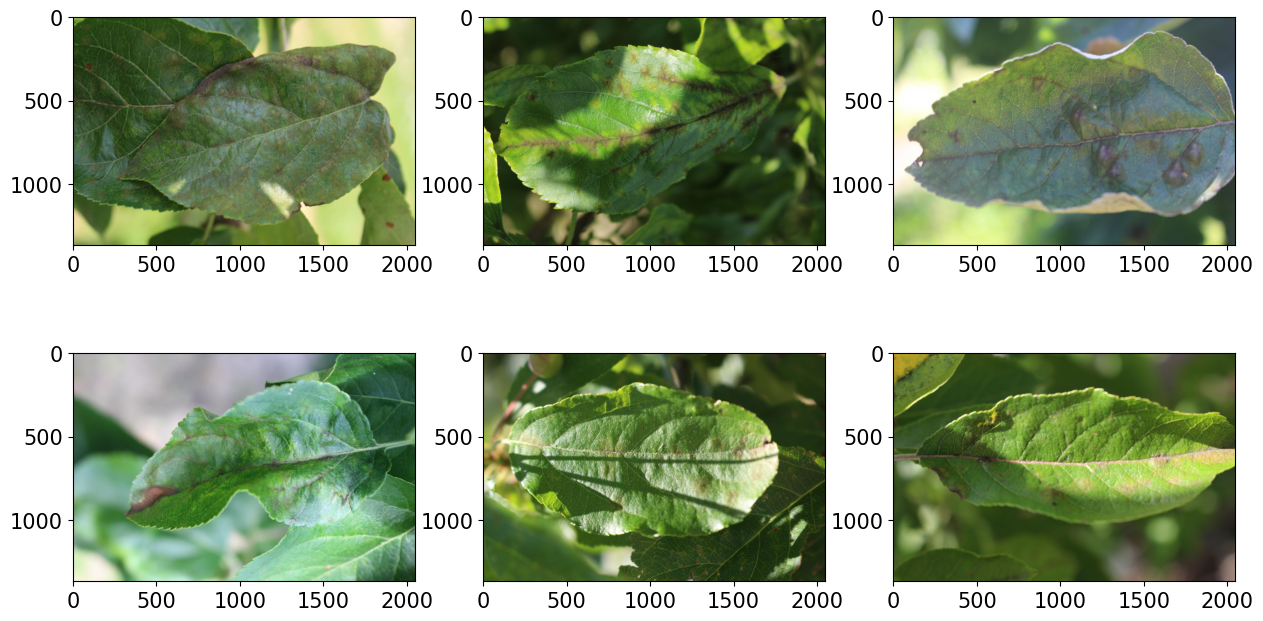

In [17]:
show_image(last_scab_img_ids) # 붉은 곰팡이병에 걸린 잎사귀